In [524]:
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [468]:
#Open Sample_data file and read each line based on new line
file_object=open("C:\\Users\\skandhaswa001\\Desktop\\Python\\Sample_Data.csv", encoding = 'utf8')
data=file_object.read()
rows=data.split('\n')

In [445]:
#Count delimiter count from the header of the file
delimiter_count=len(rows[0].split(','))

In [480]:
bad_data={}
good_data=[]
good_data_list=[]
for idx,line_data in enumerate(rows) : 
    bad_data[idx]={}
    #Blank space row moving into bad_data
    if line_data=='': 
        bad_data[idx]["Blank Row"]=line_data
    #Special Characters row moving into bad_data
    elif re.search(r'[@#!\$ひらが]',line_data) :        
        bad_data[idx]["Special Characters"]=line_data
    elif len(line_data.replace(',',''))==0 :
        bad_data[idx]["Empty String"]=line_data
    #Inconsistent delimiter row moving into bad_data
    elif  len(line_data.split(','))!= delimiter_count :
        bad_data[idx]["Inconsistent Delimiter"]=line_data
    else :
        con=str(idx)+","+line_data
        good_data.append(con)
    
bad_data={key: value for (key,value) in  bad_data.items() if value} 
good_data_list=[row.split(",") for row in good_data]



In [481]:
#Removing duplicate, striping space and exporting the data to csv
df_all=pd.DataFrame(good_data_list,columns=good_data_list[0])[1:]
df_all = df_all.rename(columns={'0': 'RowNum'})
df=df_all.drop_duplicates(["CustomerID"],keep='first')
df[df.columns]=df.apply(lambda x: x.str.strip())
final_df=df.iloc[0:,1:] #remove index and row num column
final_df.to_csv("C:\\Users\\skandhaswa001\\Desktop\\Python\\Processed.csv",index=False)


C:\Users\skandhaswa001\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [515]:
#Handling Duplicate records into bad file
customer_id=df_all["CustomerID"]
#Getting only the duplicate record based on Customer id if repeted  -->1
dup_rows=df_all[customer_id.isin (customer_id[customer_id.duplicated()])]
#Unique customer id , which are dup -->2
dup_rows_unique=dup_rows.drop_duplicates(["CustomerID"],keep='first')
#Removing 2 from 1
dup_rows=dup_rows.drop(dup_rows_unique.index)
dup_rows=dup_rows.set_index("RowNum")
#converting series to list
dup_inx=dup_rows.index
#looping through the list to get dup record from file and placing into bad data dictionary
for each in dup_inx:
    each=int(each)
    bad_data[each]={}
    bad_data[each]["Duplicate"]=rows[each]
    
newdict_bad = {(k1, k2):v2 for k1,v1 in bad_data.items() for k2,v2 in bad_data[k1].items()}   


In [518]:
bad_df = pd.DataFrame([newdict_bad[i] for i in sorted(newdict_bad)],
                  index=pd.MultiIndex.from_tuples([i for i in sorted(newdict_bad.keys())]))
#bad_df.columns=['Rownum','ErrorType' 'Data']
bad_df=bad_df.reset_index()
bad_df=bad_df.rename(columns={'level_0':'Rownum','level_1':'ErrorType',0:'Data'})
bad_df.to_csv("C:\\Users\\skandhaswa001\\Desktop\\Python\\Bad_Records.csv",index=False)

In [519]:
#import sqlite3
#conn=sqlite3.connect("C:\\Users\\skandhaswa001\\Desktop\\Python\\Cleanup.db")
#final_df.to_sql("Customer1",conn,index=False)
#cur=conn.cursor()
#cur.execute("select * from Customer;").fetchall()

ValueError: incompatible sizes: argument 'height' must be length 1 or scalar

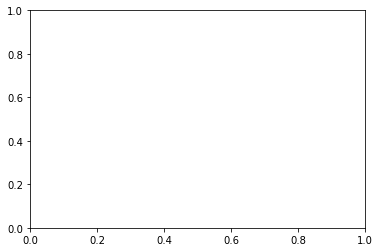

In [590]:
Error_count=bad_df["ErrorType"].value_counts()
Index=Error_count.index.tolist()
value=pd.to_numeric(Error_count.tolist())
plt.bar( 4,value,0.5)

